<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3746771220.py:15: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-3746771220.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3746771220.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment usin

        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN         NaN                       418     2   
top             NaN         NaN         NaN  Peter, Master. Michael J  male   
freq            NaN         NaN         NaN                         1   266   
mean    1100.500000    0.363636    2.265550                       NaN   NaN   
std      120.810458    0.481622    0.841838                       NaN   NaN   
min      892.000000    0.000000    1.000000                       NaN   NaN   
25%      996.250000    0.000000    1.000000                       NaN   NaN   
50%     1100.500000    0.000000    3.000000                       NaN   NaN   
75%     1204.750000    1.000000    3.000000                       NaN   NaN   
max     1309.000000    1.000000    3.000000                       NaN   NaN   

               Age       SibSp       Parch    Ticke

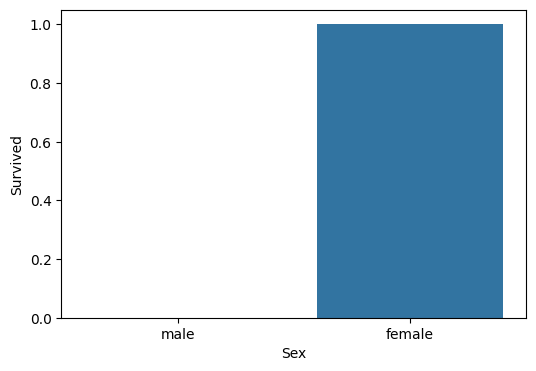

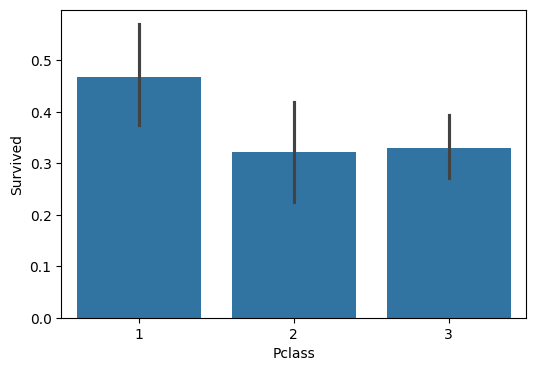

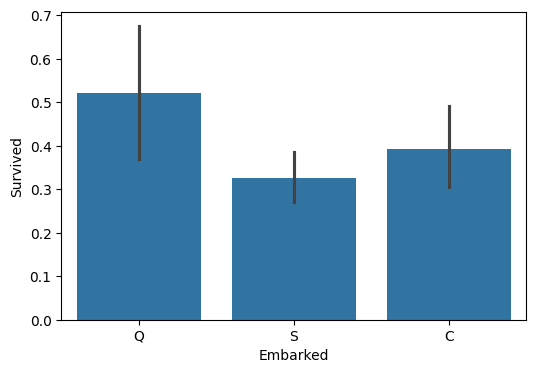

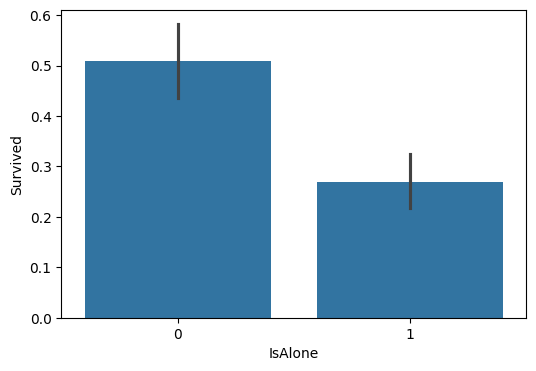

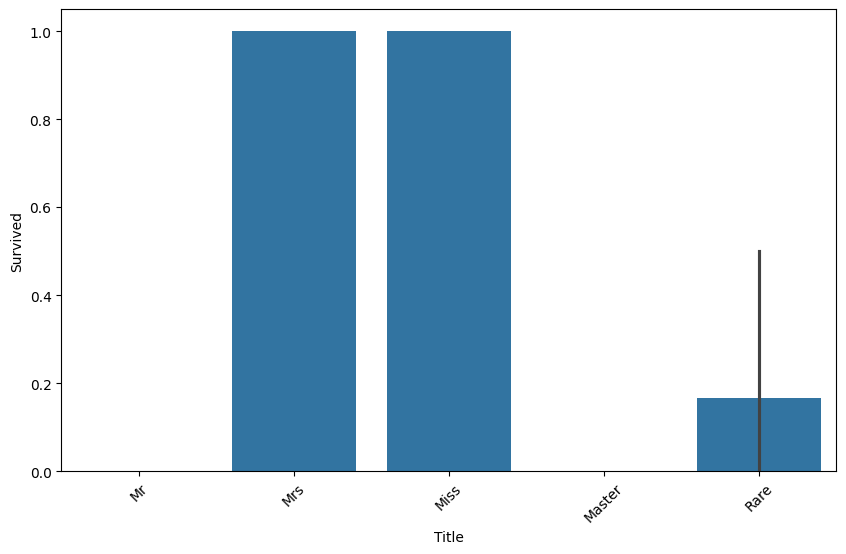

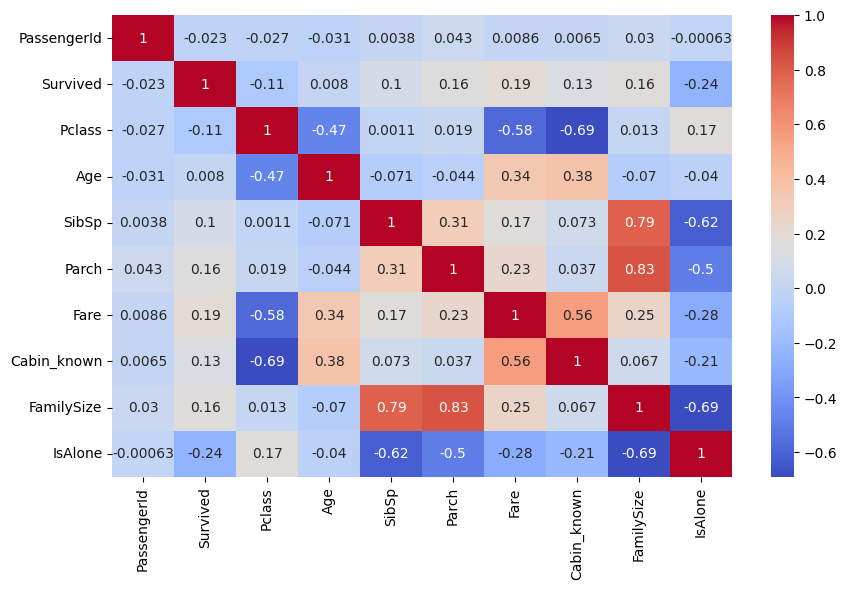

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tested.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin_known'] = df['Cabin'].notna().astype(int)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

print(df.describe(include='all'))
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())
print(df.groupby('Embarked')['Survived'].mean())
print(df.groupby('IsAlone')['Survived'].mean())
print(df.groupby('Title')['Survived'].mean())

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()
